In [157]:
import pandas as pd
import os

In [158]:
os.listdir("../dataset")

['rdu-weather-history.csv',
 'MNIST',
 'opencv-detect',
 'breast_cancer_wisconsin_data.csv',
 'Bike-Sharing-Dataset',
 'movie_metadata.csv']

In [159]:
df = pd.read_csv("../dataset/movie_metadata.csv")

In [160]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [161]:
from sklearn.datasets import make_regression
import numpy as np

### Data Preparation

In [162]:
def get_dataset(shape):
    u = 250
    sigma = 50
    X = np.random.randn(shape[0])*sigma + u
    e = np.random.randn(shape[0])
    Y = 3*X+ 0.5*e + 5
    return X, Y

In [163]:
X, Y = get_dataset((10,))

In [164]:
import matplotlib.pyplot as plt

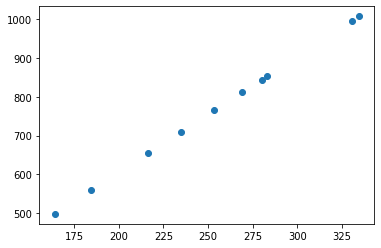

In [165]:
plt.scatter(X, Y);

In [166]:
sigma = np.std(X) 
u = np.mean(X)

# same sigma and u will be used to normalized the test data as well

In [167]:
sigma

53.548748819347544

### Nomarlising Data

In [168]:
X_new = (X - u)/sigma

In [169]:
X_new

array([ 0.46554372, -0.721983  , -1.69675123,  1.48307708, -1.31135713,
        0.52382061,  0.26082574,  1.40658631, -0.03310493, -0.37665718])

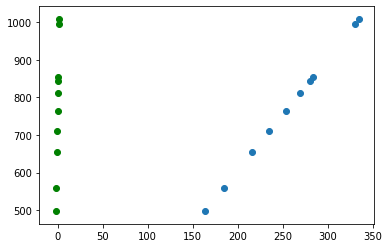

In [170]:
plt.scatter(X, Y);
plt.scatter(X_new, Y, color ="green")

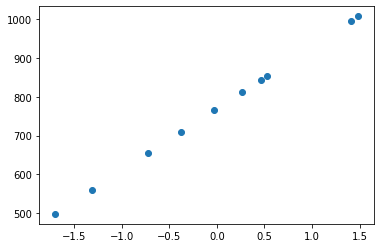

In [171]:
plt.scatter(X_new, Y);

In [172]:
a = np.array(([1, 2, 3], [4, 5, 6], [7, 8, 9]))

In [173]:
b = np.random.randn(3, 3)
b

array([[ 0.33728258,  1.11231051,  0.71775504],
       [-0.83872908,  1.35059561,  1.34969176],
       [-1.74305311, -0.78625197,  1.17889774]])

In [174]:
a.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [175]:
np.linalg.pinv(a)

array([[-6.38888889e-01, -1.66666667e-01,  3.05555556e-01],
       [-5.55555556e-02,  3.36727575e-17,  5.55555556e-02],
       [ 5.27777778e-01,  1.66666667e-01, -1.94444444e-01]])

In [176]:
np.dot(a, b)

array([[ -6.5693349 ,   1.45474582,   6.95383178],
       [-13.30283372,   6.48470827,  16.69286538],
       [-20.03633254,  11.51467072,  26.43189899]])

In [177]:
X = X.reshape((-1, 1))

ones = np.ones((X.shape[0], 1))

X = np.hstack((ones, X))



In [178]:
X

array([[  1.        , 279.87949256],
       [  1.        , 216.28892234],
       [  1.        , 164.09130321],
       [  1.        , 334.36713078],
       [  1.        , 184.72867495],
       [  1.        , 283.00014689],
       [  1.        , 268.91710057],
       [  1.        , 330.27114534],
       [  1.        , 253.17748099],
       [  1.        , 234.78068809]])

In [179]:
def theta(X, Y):
    xt = X.T
    first_term = np.linalg.pinv(np.dot(xt, X))
    second_term = np.dot(xt, Y)
    
    mul = np.dot(first_term, second_term)
    
    return mul

In [180]:
t = theta(X, Y)

In [181]:
t

array([5.4187302 , 2.99836263])

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lr = LinearRegression()

In [184]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
lr.intercept_

5.418730198793355

In [186]:
lr.coef_

array([0.        , 2.99836263])

In [187]:
X

array([[  1.        , 279.87949256],
       [  1.        , 216.28892234],
       [  1.        , 164.09130321],
       [  1.        , 334.36713078],
       [  1.        , 184.72867495],
       [  1.        , 283.00014689],
       [  1.        , 268.91710057],
       [  1.        , 330.27114534],
       [  1.        , 253.17748099],
       [  1.        , 234.78068809]])

In [188]:
lr.predict(X)

array([ 844.59894278,  653.93135314,  497.42396234, 1007.97264124,
        559.30228663,  853.95579611,  811.72971625,  995.69139155,
        764.53662903,  709.3763726 ])

In [189]:
lr.score(X, Y)

0.9999940842109803

## Locally weighted linear regression

In [190]:
dfx = pd.read_csv("../dataset/locally-weighted/weightedX.csv")
dfy = pd.read_csv("../dataset/locally-weighted/weightedX.csv")

In [202]:
 = np.array(dfx)[:, 0]
Y = np.array(dfy)[:, 0]

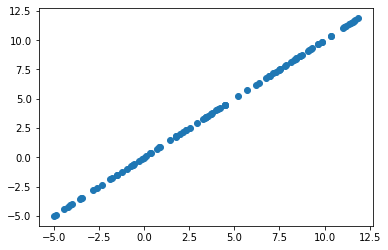

In [204]:
plt.scatter(X, Y)
plt.show()